In [1]:
!pip install -e ..

Obtaining file:///home/chris/Projects/ml_scratch
  Attempting uninstall: ml-scratch
    Found existing installation: ml-scratch 0.0.1
    Uninstalling ml-scratch-0.0.1:
      Successfully uninstalled ml-scratch-0.0.1
  Running setup.py develop for ml-scratch


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 20
})

In [3]:
import ml_scratch as ml

In [4]:
n = 200
m = 2
y = np.random.choice([-1,1], n)
X0 = np.random.randn(n, m) - np.array([0.9, 0.9])
X1 = np.random.randn(n, m) - np.array([-0.9, -0.9])
X = X0.copy()
X[y == 1] = X1[y == 1]
y.shape

(200,)

/home/chris/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


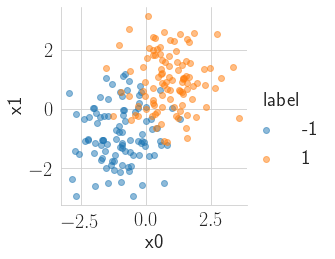

In [5]:
df = pd.DataFrame(X)
df.columns = ['x0', 'x1']
df['label']= y

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="label", size=4) \
   .map(plt.scatter, "x0", "x1", alpha = 0.5) \
   .add_legend()
plt.show()

In [13]:
dt = ml.DecisionTree(max_depth=20)
dt.fit(X, y)

In [14]:
dx = 2

def visit(node):
    if 'left' in node:
        wll, wlr = visit(node['left'])
        wl = wll + wlr + 0.5*dx
        node['left_dx'] = - 0.5*dx - wlr
    else:
        wl = 0.5*dx
        
    if 'right' in node:
        wrl, wrr = visit(node['right'])
        wr = 0.5*dx + wrl + wrr
        node['right_dx'] = 0.5*dx + wrl
    else:
        wr = 0.5*dx
    return wl, wr
visit(dt.root)

(39.0, 43.0)

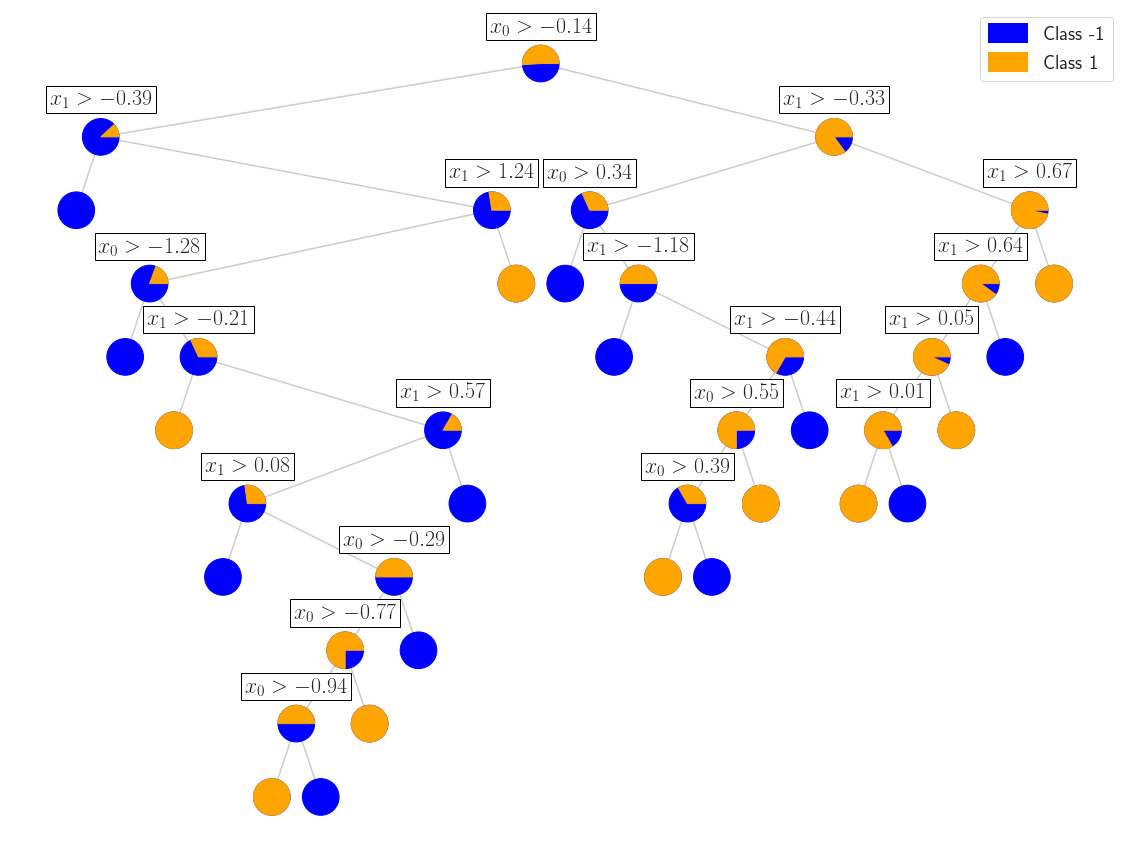

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patches
from matplotlib.lines import Line2D

fig = plt.figure(figsize= (20,20))
ax = fig.add_subplot(111)

def visit(node, xp, yp):
    #radius = 2*node['num_samples']/y_len+0.4
    circle = plt.Circle((xp, yp), radius, color='blue', zorder= 1)
    ax.add_patch(circle)
    p = node['frac_positive']
    if p>0:
        theta1 = 0
        theta2 = 360*p
        wedge = patches.Wedge((xp, yp), radius, theta1, theta2, color='orange', zorder= 1, label = 'class 1')
        ax.add_patch(wedge)
    
    if 'split' in node:
        split = node['split']
        ax.text(xp, 
                yp+2.25, 
                rf"$x_{split.feature_idx} > {split.threshold:.2f}$", 
                horizontalalignment='center',
                verticalalignment='bottom',
                size=22,
                bbox=dict(facecolor='white', edgecolor = 'black', alpha=1))
    
    if 'left' in node:
        x = xp + node['left_dx']
        y = yp - dy
        ax.plot([xp, x], [yp, y], color = 'black', zorder= 0, alpha = 0.2)
        visit(node['left'], x, y)
            
    if 'right' in node:
        x = xp + node['right_dx']
        y = yp - dy
        ax.plot([xp, x], [yp, y], color = 'black', zorder= 0, alpha = 0.2)
        visit(node['right'], x, y)
        
        
y_len = len(y)
radius = 1.5
dy=6
visit(dt.root, 0, 0)

cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color="blue", lw=20, solid_capstyle='butt'),
                Line2D([0], [0], color="orange", lw=20,  solid_capstyle='butt')]
ax.legend(custom_lines, ['Class -1', 'Class 1'])

ax.grid(False)
plt.axis('off')
ax.set_aspect('equal')
plt.show()
fig.savefig("../images/decision_tree.svg", format="svg", bbox_inches='tight') 

In [16]:
p = dt.predict(X)

In [17]:
p.shape

(200,)

In [18]:
y_pred = 2*(p > 0.5)-1

In [19]:
sum(y == y_pred)/len(y)

1.0